## Import necessary Libaries 

### This notebook uses Tensorflow as the backend and Keras for Classification and Regression 
### Scikit-Learn is used for various data processing and evaluations 
### Matplotlib and Seaborn are used for visualizations 

In [55]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn import datasets

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils, plot_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, scale, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

## Visualizations 

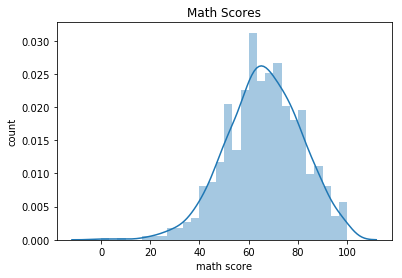

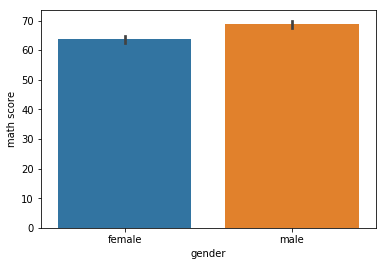

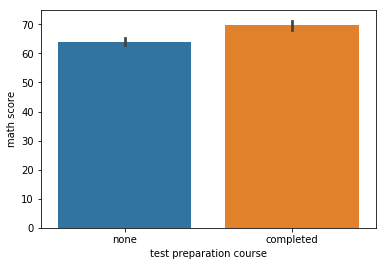

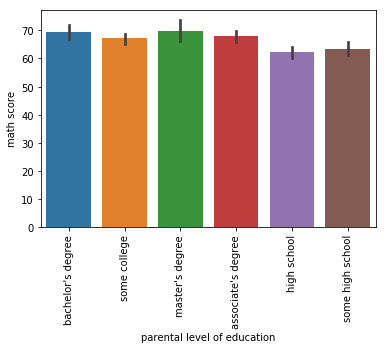

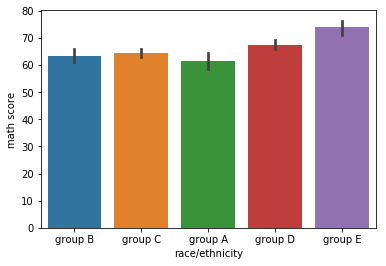

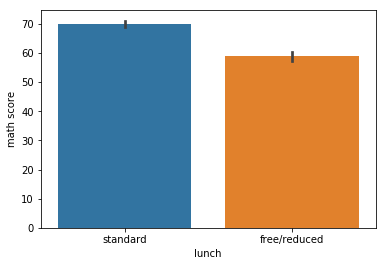

In [56]:
df = pd.read_csv("StudentsPerformance.csv",index_col=0)
# seaborn viz for math score
sns.distplot(df['math score'], bins=30)
plt.xlabel('math score')
plt.ylabel('count')
plt.title('Math Scores')
plt.show()

# seaborn viz for gender difference
df['gender'] = df.index
sns.barplot(x='gender', y='math score', data=df)
plt.show()

# seaborn viz for test prep
sns.barplot(x = 'test preparation course', y = 'math score', data=df)
plt.show()

# seaborn viz for parental education 
sns.barplot(x='parental level of education',y='math score', data=df)
plt.xticks(rotation=90)
plt.show()

# seaborn viz for test prep
sns.barplot(x = 'race/ethnicity', y = 'math score', data=df)
plt.show()

# seaborn viz for test prep
sns.barplot(x = 'lunch', y = 'math score', data=df)
plt.show()


## Cleaning/Prepping data for neural networks, must binarize and make all data machine-readable 

In [57]:
Y_reg = df['math score'].values
f = range(0,15)
d = range(15,25)
c = range(25,40)
b = range(40,80)
a = range(80,101)
f2 = [str(x) for x in f]
d2 = [str(x) for x in d]
c2 = [str(x) for x in c]
b2 = [str(x) for x in b]
a2 = [str(x) for x in a]
df.replace(f, 'F', inplace=True)
df.replace(d, 'D', inplace=True)
df.replace(c, 'C', inplace=True)
df.replace(b, 'B', inplace=True)
df.replace(a, 'A', inplace=True)
df.replace('F', '0', inplace=True)
df.replace('D', '1', inplace=True)
df.replace('C', '2', inplace=True)
df.replace('B', '3', inplace=True)
df.replace('A', '4', inplace=True)
# race/ethnicity
df.replace('group A', 0, inplace=True)
df.replace('group B', 1, inplace=True)
df.replace('group C', 2, inplace=True)
df.replace('group D', 3, inplace=True)
df.replace('group E', 4, inplace=True)
# test prep 
df.replace('none', 0, inplace=True)
df.replace('completed', 1, inplace=True)
# education replace
df.replace('some high school', 0, inplace=True)
df.replace('high school', 1, inplace=True)
df.replace('some college', 2, inplace=True)
df.replace("associate's degree", 3, inplace=True)
df.replace("bachelor's degree", 4, inplace=True)
df.replace("master's degree", 5, inplace=True)
#df.replace("associate's degree", 3, inplace=True)
# lunch replace
df.replace('free/reduced', 0, inplace=True)
df.replace('standard', 1, inplace=True)

# gender replace
df.replace('male', 0, inplace=True)
df.replace('female', 1, inplace=True)

df

race/ethnicity  parental level of education  lunch  \
gender                                                       
female               1                            4      1   
female               2                            2      1   
female               1                            5      1   
male                 0                            3      0   
male                 2                            2      1   
female               1                            3      1   
female               1                            2      1   
male                 1                            2      0   
male                 3                            1      0   
female               1                            1      0   
male                 2                            3      1   
male                 3                            3      1   
female               1                            1      1   
male                 0                            2      1   
female               0                            5      1   
female               2                            0      1   
male                 2                            1      1   
female               1                            0      0   
male                 2                            5      0   
female               2                            3      0   
male                 3                            1      1   
female               1                            2      0   
male                 3                            2      1   
female               2                            0      1   
male                 3                            4      0   
male                 0                            5      0   
male                 1                            2      1   
female               2                            4      1   
male                 2                            1      1   
female               3                            5      1   
...                ...                          ...    ...   
female               3                            4      1   
male                 2                            0      1   
female               0                            1      0   
female               3                            2      0   
female               0                            2      1   
female               2                            2      1   
male                 1                            2      0   
male                 2                            3      1   
male                 3                            1      1   
female               2                            3      1   
female               1                            1      0   
male                 3                            0      1   
male                 1                            0      1   
female               0                            2      1   
female               2                            0      1   
male                 0                            1      1   
female               2                            3      1   
male                 4                            0      1   
female               0                            0      0   
female               3                            2      0   
male                 4                            1      0   
female               1                            0      1   
female               3                            3      0   
female               3                            4      0   
male                 0                            1      1   
female               4                            5      1   
male                 2                            1      0   
female               2                            1      0   
female               3                            2      1   
female               3                            2      0   

        test preparation course math score reading score writing score  gender  
gender              

## Selecting features and cleaning output 

In [58]:
sel_feature = ['lunch','parental level of education', 'test preparation course', 'writing score', 'reading score', 'race/ethnicity', 'gender'] # Select features

Y = df['math score'].values
Y = Y.flatten()

## Designing neural network for classification --> ReLU in hidden layers, Softmax in output layer, Adam Optimizer for training

In [59]:
def baseline_model(): 
    model = Sequential()
    model.add(Dense(8, input_dim=7, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## Splitting data into training and testing sets

In [60]:
# train model 
#X = scale(X)
X = df[sel_feature].values
train = df.sample(frac=0.8, random_state=1) # random pick 80% for training
test = df.sample(frac=0.2, random_state=1)
X_train = train[sel_feature].values
X_test = test[sel_feature].values

X_train = scale(X_train)
X_test = scale(X_test)
print(X_train.shape)
print(X_test.shape)


(800, 7)
(200, 7)


/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [61]:
Y_train = train['math score'] # put last columns in y
Y_test = test['math score']   # put last columns in y

print(Y_train.shape)
print(Y_test.shape)

(800,)
(200,)


## Binarizing Output 

In [62]:
encoder = LabelEncoder()
encoder.fit(Y_train)
dummy_training = np_utils.to_categorical(Y_train)
encoder.fit(Y_test)
dummy_testing = np_utils.to_categorical(Y_test)
dummy_var = np_utils.to_categorical(Y)
lb = LabelBinarizer() 
Y_b = lb.fit_transform(Y_test)
print(dummy_training.shape)
print(dummy_testing.shape)

(800, 5)
(200, 5)


## Training and testing classification model 

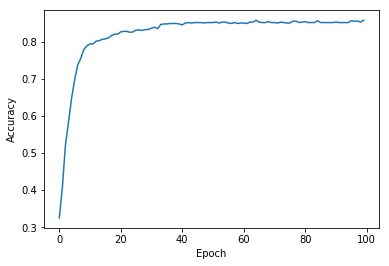

In [63]:
model = baseline_model()
history = model.fit(X_train,dummy_training,epochs=100,verbose=0)
Y_pred = model.predict_classes(X_test)
Y_pred2 = model.predict(X_test)
plt.plot(history.history['acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
#print(Y_pred2)
#print(Y_pred)

## Building regression model

In [64]:
# build model
def baseline_regression_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=7, activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

X = scale(X)
# train model
model2 = baseline_regression_model();
history = model2.fit(X,Y_reg,epochs=100,verbose=0)
y_pred = model2.predict(X)
print(y_pred)

from sklearn.metrics import mean_squared_error
from math import sqrt
m = mean_squared_error(Y, y_pred)
print(sqrt(m))

/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


[[ 56.61146 ]
 [ 77.88176 ]
 [ 87.15976 ]
 [ 53.987778]
 [ 66.54771 ]
 [ 72.09694 ]
 [ 72.3257  ]
 [ 48.16679 ]
 [ 63.094353]
 [ 48.65637 ]
 [ 66.38489 ]
 [ 70.20849 ]
 [ 72.56719 ]
 [ 64.92519 ]
 [ 61.249706]
 [ 56.76711 ]
 [ 89.88383 ]
 [ 31.144283]
 [ 64.93299 ]
 [ 52.5392  ]
 [ 68.457146]
 [ 51.007824]
 [ 68.29433 ]
 [ 56.76711 ]
 [ 76.968376]
 [ 60.12318 ]
 [ 64.80108 ]
 [ 57.09404 ]
 [ 66.71052 ]
 [ 63.956886]
 [ 57.47292 ]
 [ 57.081722]
 [ 65.32086 ]
 [ 68.56963 ]
 [ 94.086754]
 [ 81.66396 ]
 [ 80.95826 ]
 [ 52.365177]
 [ 70.85356 ]
 [ 52.015907]
 [ 55.870605]
 [ 54.98223 ]
 [ 56.84659 ]
 [ 63.553734]
 [ 58.85497 ]
 [ 64.63826 ]
 [ 54.272507]
 [ 54.867767]
 [ 53.51354 ]
 [ 94.53972 ]
 [ 74.76829 ]
 [ 67.10653 ]
 [ 66.54771 ]
 [ 68.457146]
 [ 76.40173 ]
 [ 48.315594]
 [ 90.44673 ]
 [ 70.20849 ]
 [ 65.81387 ]
 [ 35.778946]
 [ 69.46577 ]
 [ 43.89314 ]
 [ 53.987778]
 [ 69.42623 ]
 [ 57.81489 ]
 [ 66.03186 ]
 [ 49.087322]
 [ 54.411007]
 [ 52.015907]
 [ 54.98223 ]
 [ 51.154305]
 [ 65.